In [36]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10433435569434570011, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12570228959606657896
 physical_device_desc: "device: XLA_CPU device"]

In [25]:
#first, the optimization options.
N = 50 #hilbert space size
alpha_cat = 2 + 1j #desired cat alpha
params = {
'N_blocks' : 6, #number of blocks in circuit
'N_multistart' : 10, #number of optimizations to run in parallel
'epochs' : 20, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.99, #terminal fidelitiy
'use_displacements' : False, #use D operators in optimization
'no_CD_end' : False, #set final CD = 0
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'alpha_scale' : 0.5, #maximum |alpha| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))],
'target_states' : [qt.tensor(qt.basis(2,0), (qt.coherent(N,alpha_cat) + qt.coherent(N,-alpha_cat)).unit())],
'name' : 'Cat creation', #name for printing and saving
'filename' : None, 
#if no filename specified, will be saved in this folder with default name #"name.h5" 
'alpha_cat' : alpha_cat, #note: can pass arbitrary parameters, will be saved
}


In [26]:
#create optimization object. 
#Note that initial params will be randomized upon creation
opt = BatchOptimizer(**params)

In [18]:
#print current info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 10
N_blocks: 6
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
name: Cat creation
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [ 0.03101-2.1487j  -0.97296-2.17024j -1.04941+0.7861j  -0.21847+0.43455j
  0.20975+1.0515j   0.90152+2.28019j]
alphas:        [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [   0.      -155.53479  166.5778   118.46504 -150.91693  151.79005]
thetas (deg):  [-178.36906   89.66162 -154.55627   95.72865  -90.38078  -47.74509]
Max Fidelity:  0.166518




In [19]:
#run optimizer.
opt.optimize()
#note that every time an optimizer is run, it will add to the same .h5 file in the filename, saving the data with a new timestamp

Start time: 2020-10-25 11:19:19
 Epoch: 7 / 200 Max Fid: 0.992014 Avg Fid: 0.657143 Max dFid: 0.125850 Avg dFid: 0.054518 Elapsed time: 0:00:07.933105 Remaing time: 0:03:38.727031

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 6
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
name: Cat creation
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [-1.09848-1.35488j -2.09305-2.16186j -1.93645+0.12869j -0.00716+0.37159j
 -0.37577+0.56222j  0.77841+1.82977j]
alphas:        [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [   0.      -116.23291  206.03876  132.53012 -184.93523  102.97563]
thetas (deg):  [-182.95161   88.84644 -182.92545   91.92275  -70.89586  -29.11854]
Max Fidelity:  0.992336


all data saved as: Cat creation.h5
termination reason: term_fid

'2020-10-25 11:19:19'

In [20]:
#now, we can analyze the results.
#note that all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I would recommend using "HDFview" software to understand data structure
filename = opt.filename
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 6
N_cav: 50
N_multistart: 10
alpha_cat: (2+1j)
alpha_scale: 0.5
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 7.933104753494263
epoch_size: 10
epochs: 200
learning_rate: 0.01
name: Cat creation
no_CD_end: False
optimization_type: state transfer
term_fid: 0.99
termination_reason: term_fid
use_displacements: False
filename: Cat creation.h5

Best circuit parameters found:
betas:         [-1.09848-1.35488j -2.09305-2.16186j -1.93645+0.12869j -0.00716+0.37159j
 -0.37577+0.56222j  0.77841+1.82977j]
alphas:        [-1.09848-1.35488j -2.09305-2.16186j -1.93645+0.12869j -0.00716+0.37159j
 -0.37577+0.56222j  0.77841+1.82977j]
phis (deg):    [ -62.93845 -77.62878j -119.92303-123.86525j -110.95013  +7.37347j
   -0.41021 +21.29059j  -21.53014 +32.21267j   44.59933+104.83798j]
thetas (deg):  [ -62.93845 -77.62878j -119.92303-123.86525j -110.95013  +7.37347j
   -0.41021 +21.29059j  -21.53014 +32.21267j   44.59933+104.83798j]
Max Fidelity:  0.992014




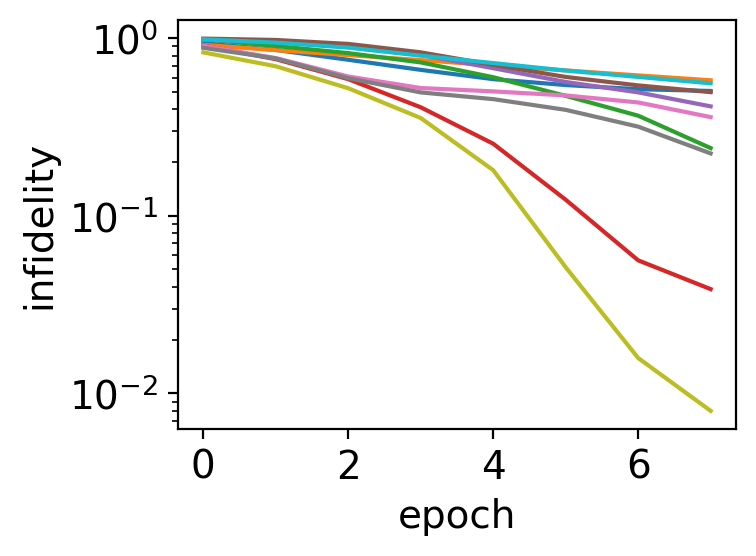

In [21]:
#We can plot the trajectories of the different parallel optimizations
analysis.plot_fidelities()

In [22]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
best_circuit = analysis.best_circuit()
print(best_circuit)
target_state = analysis.target_state()
print(target_state)

{'fidelity': 0.99201375, 'betas': array([-1.0984832 -1.354878j  , -2.093052  -2.1618567j ,
       -1.9364452 +0.12869129j, -0.00715949+0.37159085j,
       -0.37577188+0.56221706j,  0.77840513+1.8297681j ], dtype=complex64), 'alphas': array([-1.0984832 -1.354878j  , -2.093052  -2.1618567j ,
       -1.9364452 +0.12869129j, -0.00715949+0.37159085j,
       -0.37577188+0.56221706j,  0.77840513+1.8297681j ], dtype=complex64), 'phis': array([-1.0984832 -1.354878j  , -2.093052  -2.1618567j ,
       -1.9364452 +0.12869129j, -0.00715949+0.37159085j,
       -0.37577188+0.56221706j,  0.77840513+1.8297681j ], dtype=complex64), 'thetas': array([-1.0984832 -1.354878j  , -2.093052  -2.1618567j ,
       -1.9364452 +0.12869129j, -0.00715949+0.37159085j,
       -0.37577188+0.56221706j,  0.77840513+1.8297681j ], dtype=complex64)}
Quantum object: dims = [[2, 50], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[ 1.16083083e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.46249406e-01+3.28332

In [27]:
#Now, using the same opt object, we can sweep the number of blocks in the optimization.
sweeper = OptimizationSweeps(opt_object=opt)
sweeper.N_blocks_sweep(min_N_blocks=3, max_N_blocks=6, terminate=True) #"terminate" option specifies if it terminates sweep when term fid is met


starting N blocks sweep

N_blocks: 3
N blocks sweep filename: Cat creation.h5
N blocks sweep name: sweep N_blocks 2020-10-25 11:32:32

Start time: 2020-10-25 11:32:32
 Epoch: 20 / 20 Max Fid: 0.970745 Avg Fid: 0.553958 Max dFid: 0.016370 Avg dFid: 0.001992 Elapsed time: 0:00:11.065651 Remaing time: 0:00:00

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 3
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
name: Cat creation
learning_rate: 0.01
epoch_size: 10
epochs: 20
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [ 4.0115 +2.00486j -0.15346+0.29687j  0.01616-0.03351j]
alphas:        [0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [  0.      -80.00645 -10.19223]
thetas (deg):  [ 89.99028 -90.20342  90.46841]
Max Fidelity:  0.970772


all data saved as: Cat creation.h5
termin

'sweep N_blocks 2020-10-25 11:32:32'

In [28]:
#the sweep data will be nicely saved to the same h5 file. We can analyze the sweep with the sweep analysis class.
sweep_analysis = OptimizationSweepsAnalysis(filename=filename)
sweep_analysis.sweep_names #names of the sweeps it found in the file

['sweep N_blocks 2020-10-25 11:32:32']

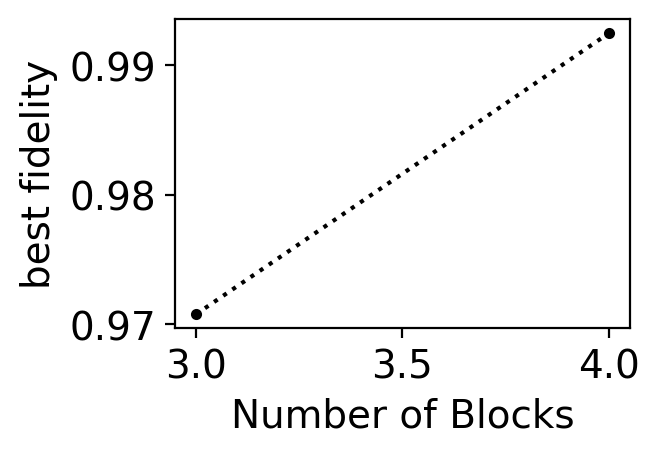

In [30]:
#we can analyze how the best fidelity found depends on the sweep parameter
sweep_analysis.plot_sweep_fidelities(log=False)

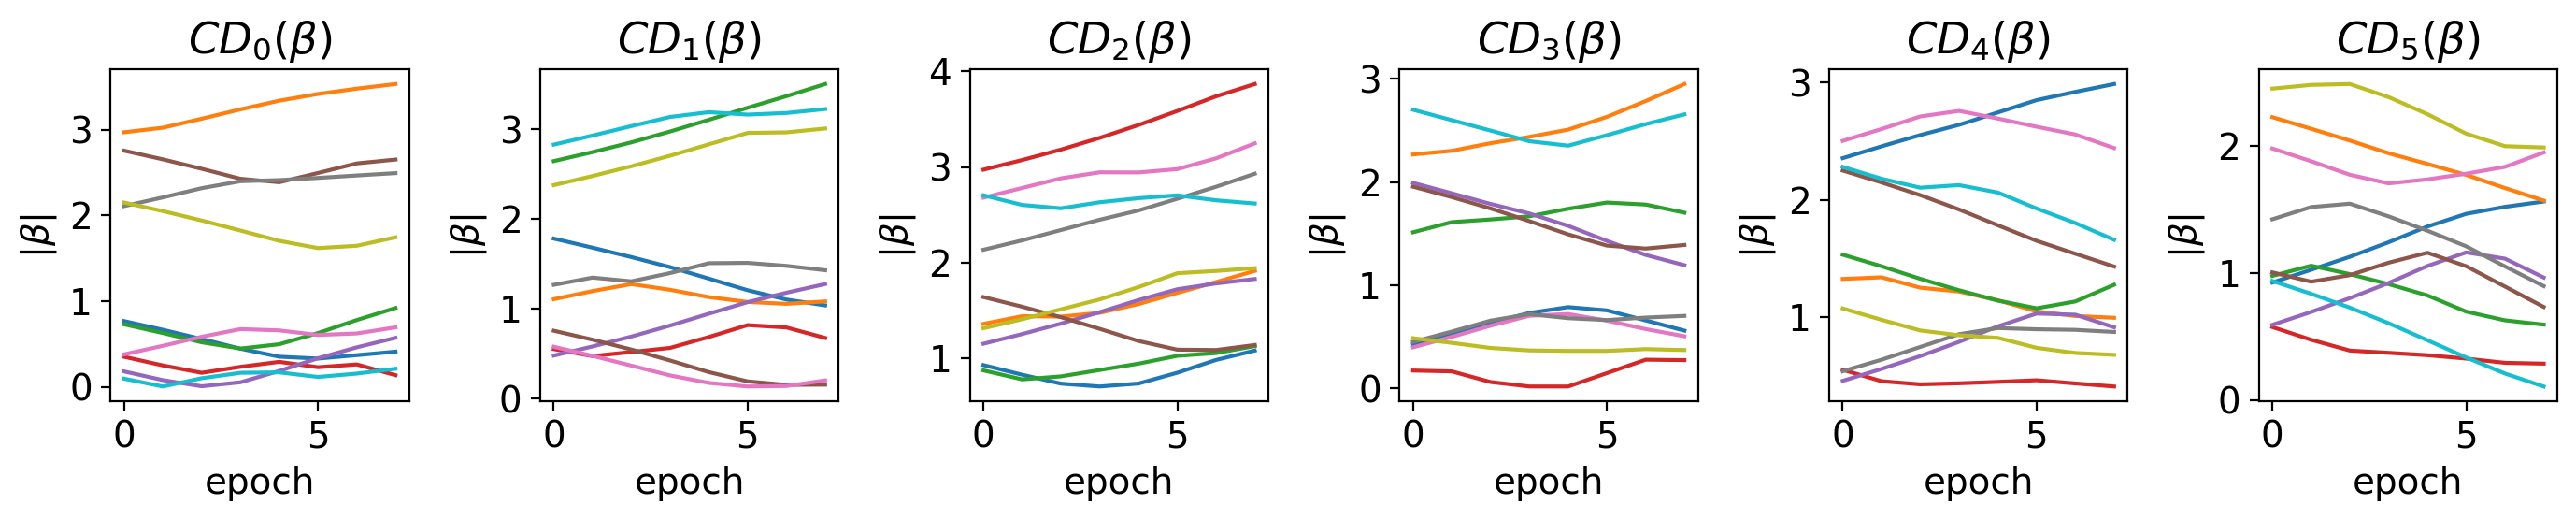

In [31]:
#there are a few other things we can plot. Better data analysis coming soon.
analysis.plot_mag_betas()

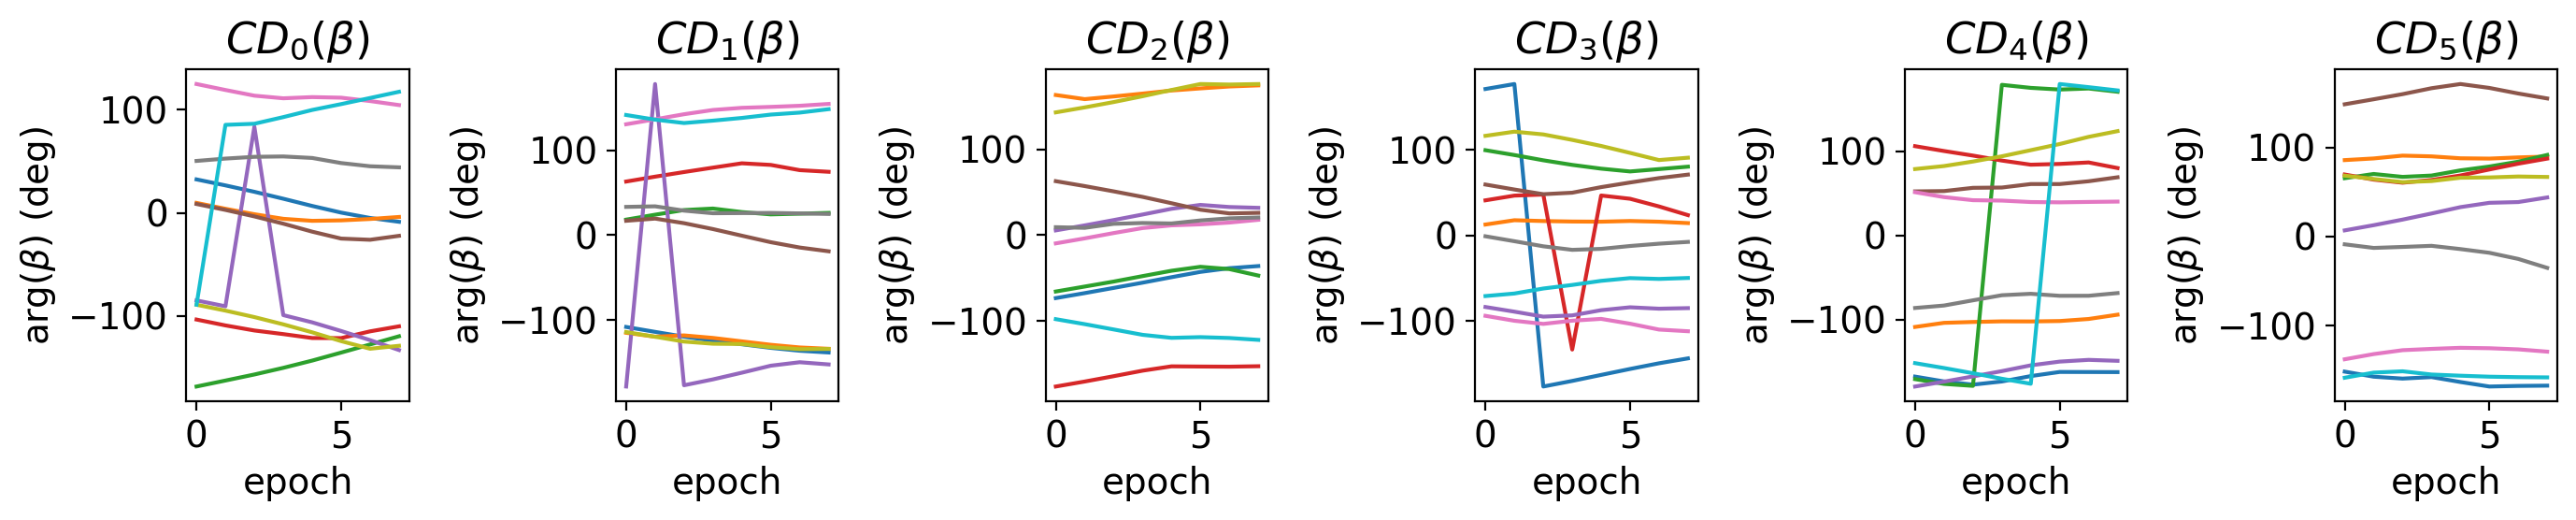

In [32]:
analysis.plot_phase_betas()

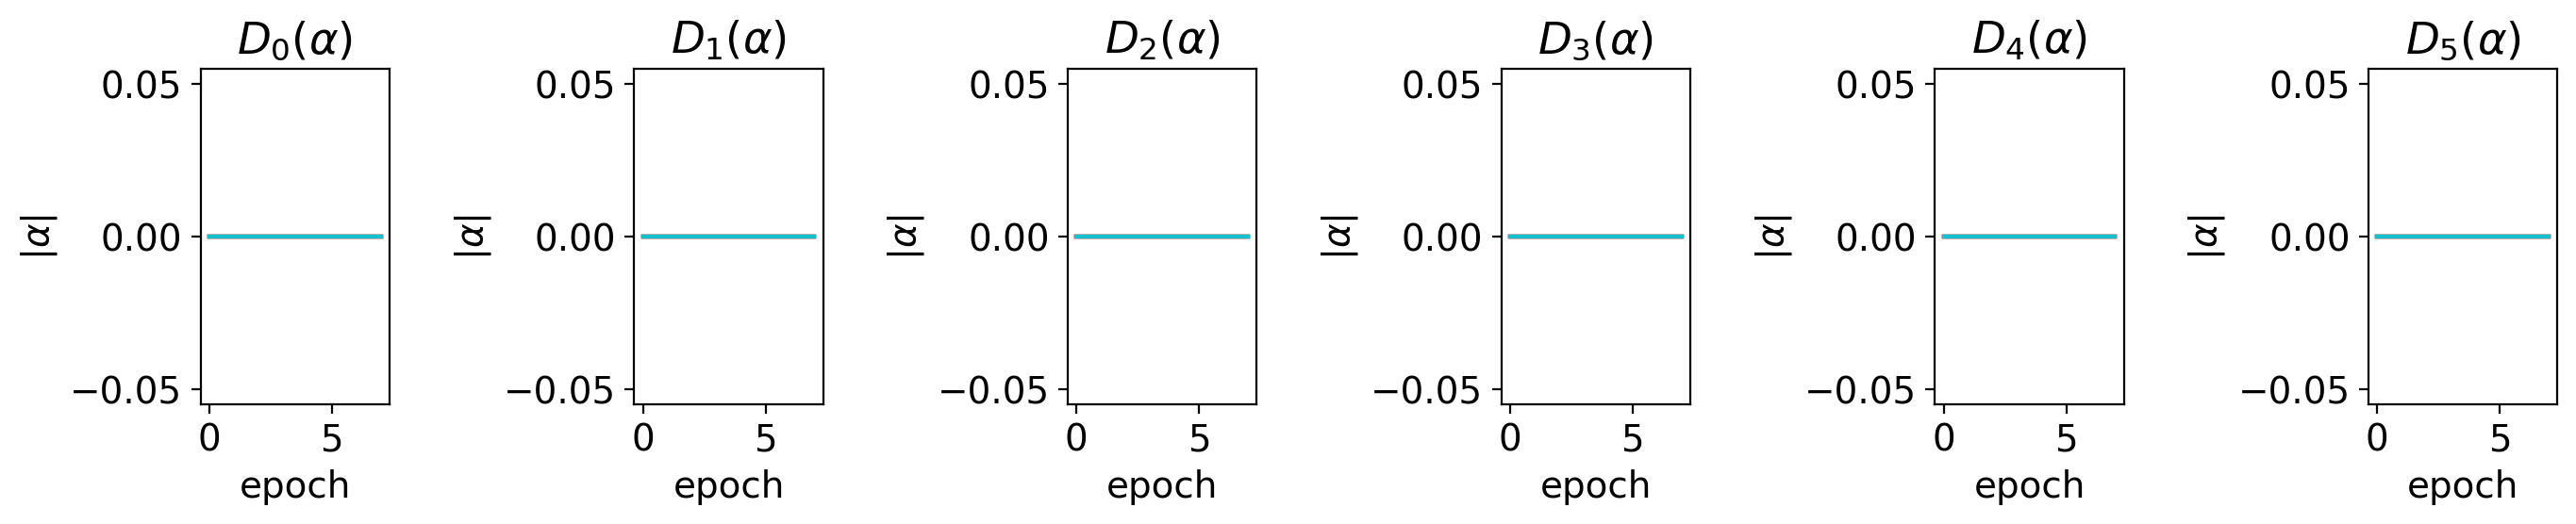

In [33]:
analysis.plot_mag_alphas()

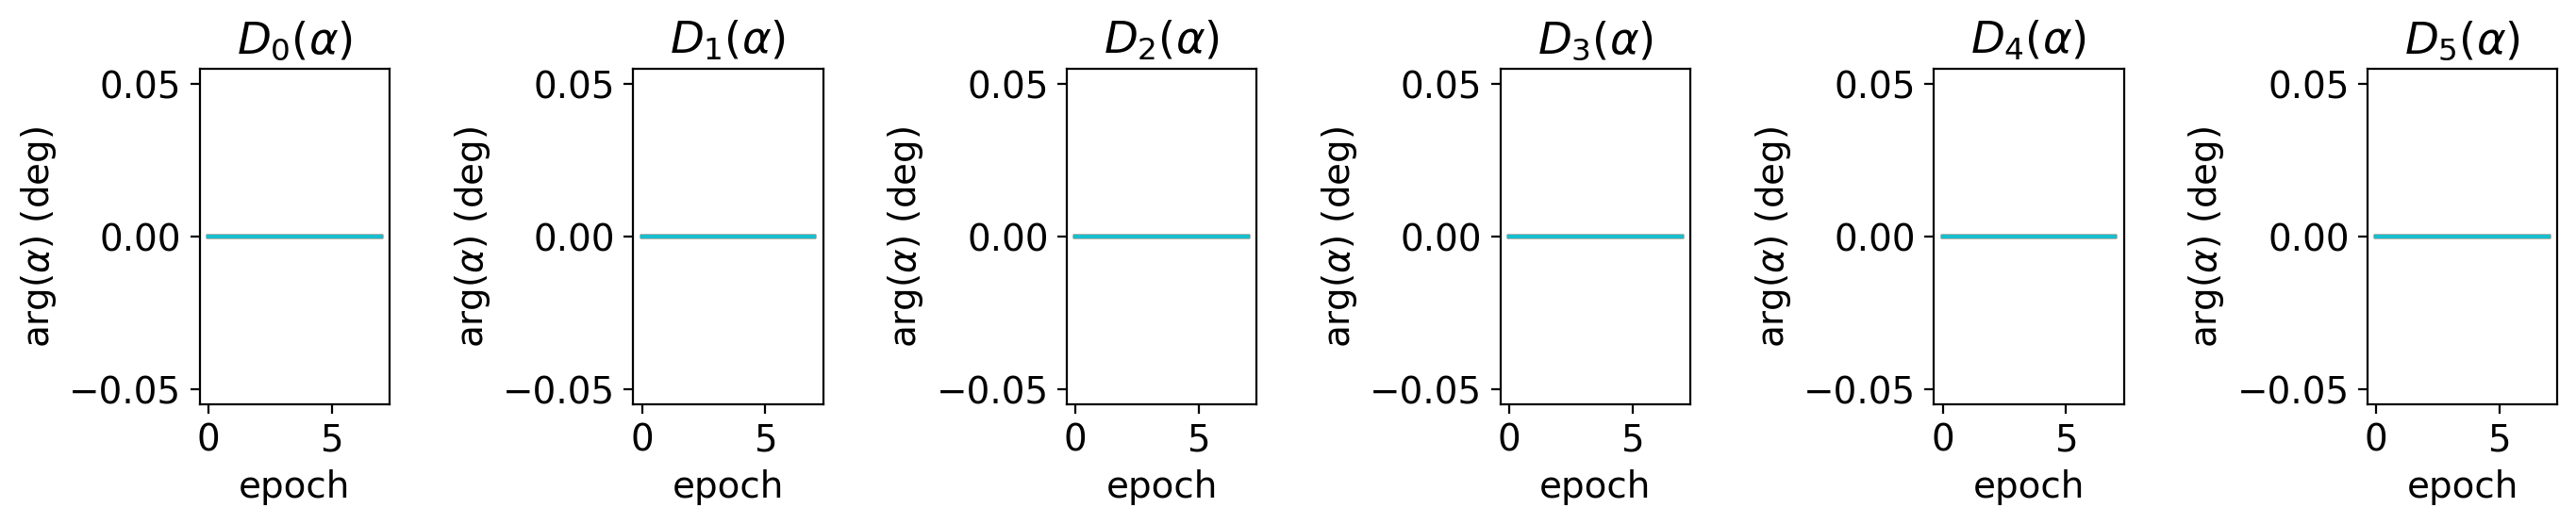

In [34]:
analysis.plot_phase_alphas()

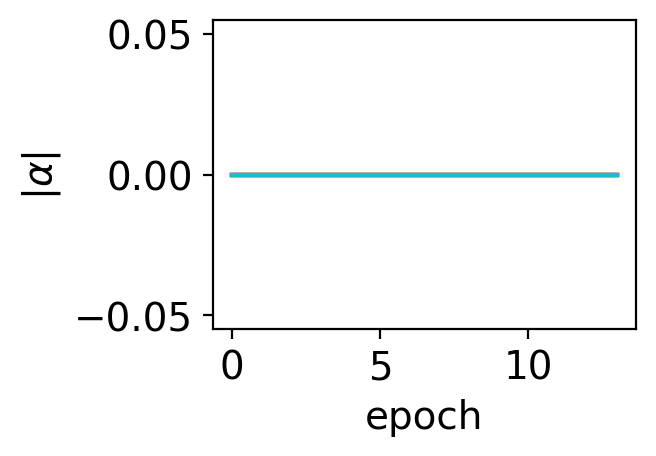

In [38]:
analysis.plot_average_magnitude_alpha()

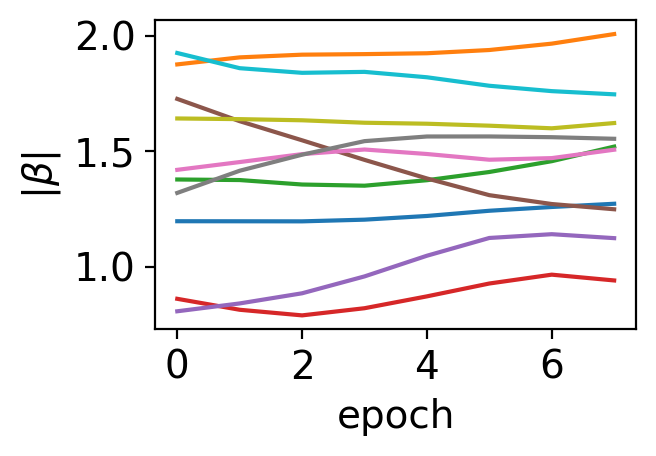

In [35]:
analysis.plot_average_magnitude_beta()